In [1]:
from QuadQuanta.data.mongodb_api import query_mongodb, save_mongodb

In [6]:
data = query_mongodb('QuadQuanta','break_limit_trend',format='pd')

In [16]:
data.describe()

,limit,next_open,next_close,next_high,next_low,next_two_open,next_two_close,next_two_high,next_two_low
count,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000
mean,0.211558,-1.426497,-0.660736,2.927432,-4.447543,-0.478367,-0.216892,3.266545,-3.499329
std,0.588460,2.679440,5.271668,4.139924,3.155717,2.431879,4.799186,3.622264,3.117459
min,0.000000,-10.120000,-10.130000,-10.050000,-10.200000,-10.120000,-10.100000,-10.000000,-10.120000
25%,0.000000,-2.740000,-4.240000,-0.180000,-6.552500,-1.602500,-3.230000,0.720000,-5.140000
50%,0.000000,-1.270000,-1.200000,2.435000,-4.110000,-0.450000,-0.495000,2.640000,-2.990000
75%,0.000000,0.000000,2.550000,5.682500,-2.240000,0.520000,2.390000,5.412500,-1.450000
max,2.000000,10.180000,10.240000,10.240000,9.990000,10.070000,10.180000,12.420000,10.070000


In [24]:
data.head()

,code,next_date,limit,next_open,next_close,next_high,next_low,next_two_open,next_two_close,next_two_high,next_two_low
_id,,,,,,,,,,,
2021-01-05-000066,000066,2021-01-05,0,-2.51,-0.24,1.06,-3.77,-0.29,-1.69,0.68,-4.12
2021-01-05-600875,600875,2021-01-05,0,-0.46,-0.37,0.56,-1.58,-0.09,-0.84,0.09,-2.23
2021-01-05-601118,601118,2021-01-05,0,-2.34,-2.34,-1.17,-4.30,0.40,-1.20,1.00,-2.00
2021-01-05-600438,600438,2021-01-05,0,-1.44,2.04,4.80,-2.38,-0.49,-0.24,2.05,-3.51
2021-01-05-601012,601012,2021-01-05,0,-1.09,4.77,6.77,-2.20,0.04,2.03,3.27,-1.26


In [26]:
len(data[(data['next_open'] > 0) & (data['next_close'] > 0)])

622

In [19]:
res_data = data

In [22]:
res_data = res_data.assign(next_two_volia = res_data['next_high'] - res_data['next_low'])

In [23]:
print(res_data['next_two_volia'].quantile([0.25, 0.5, 0.75]))

0.25    4.8875
0.50    6.7550
0.75    9.2800
Name: next_two_volia, dtype: float64


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [3]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
#         square=True, 
        square=False,
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 15 }
    )


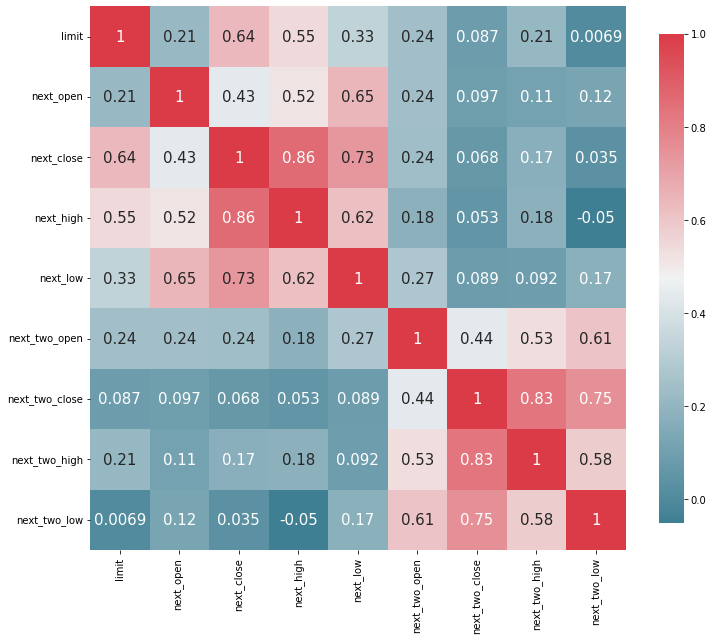

In [7]:
plot_correlation_map(data)

In [2]:
data = query_mongodb('QuadQuanta','daily_double_limit',sql={'_id':'2021-12-10'},format='pd')

In [5]:
data['symbol_list'][0]

['000892',
 '002101',
 '002232',
 '002265',
 '002374',
 '002699',
 '002725',
 '002945',
 '300860',
 '600371',
 '600698',
 '601798',
 '603335',
 '605255']